**Notebook to plot the results of the experiments explored in the Final Degree Project.**

### Plots

**Examples:**

* [Graph example](#chapter1)
* [Plots of the small experiment](#chapter6)

**TFG plots:**

* [Graph examples for several homophily values](#chapter2)
* [Degree distribution for several experiments](#chapter4)
* [% of nodes of the minority class in the top nodes with largest degree for several homophily values](#chapter5)

In [1]:
import numpy as np
import networkx as nx
import statistics
import math
import random
import os
from collections import Counter
import matplotlib.pyplot as plt

import model, graphics

# util data
base_colors = ['orange', 'blue']

### Graph example <a class="anchor" id="chapter1"></a>

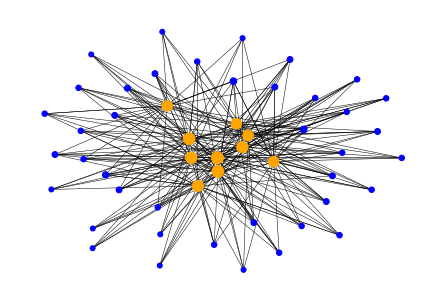

In [2]:
# Set parameters
n = 50
m = 5
c0 = 0.8
c1 = 0.2
h = 0

# Run the experiment
G, node_class = model.model(n, m, c0, c1, h)

# Plot resulting graph
node_color = ['blue' if c == 0 else 'orange' for c in node_class]
node_size = np.array(list(dict(G.degree()).values())) * 5
nx.draw(G, node_color=node_color, node_size=node_size, width=0.5)
plt.show()

### Plots of the small experiments <a class="anchor" id="chapter6"></a>

We will plot the average degree of each class in the small experiments executed in *run_experiments.ipynb*.

In [3]:
# folder in which the data is stored
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/test_data'

In [4]:
# set the parameters of each experiment
n = 500
m = 5
c0 = [0.8, 0.8, 0.8, 0.8]
c1 = [0.2, 0.2, 0.2, 0.2]
h = [0, 0.3, 0.7, 1]
n_simulations = 20

avg_degree_majority, avg_degree_minority, degree_dist_majority, degree_dist_minority, results, step = graphics.load_data_for_plots(n=n, m=m, c0=c0, c1=c1, h=h, n_simulations=n_simulations, folder_name=current_path)

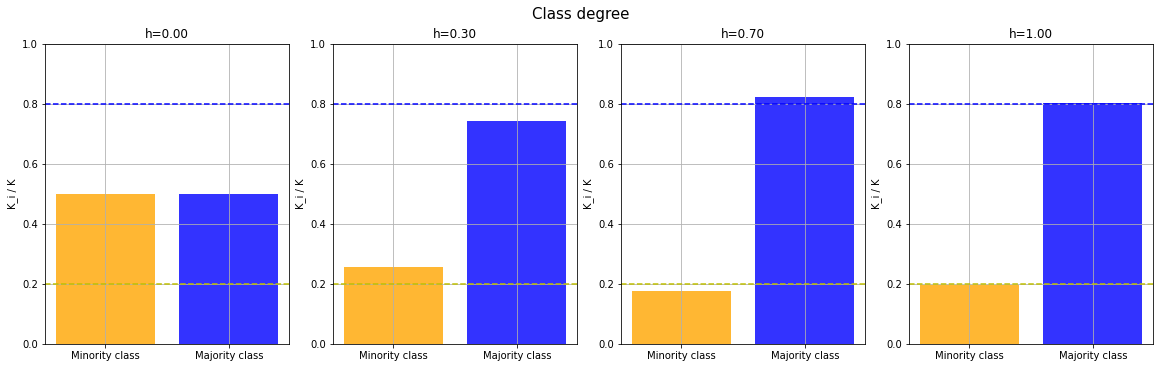

In [7]:
# Average degree barplot
fig, axes = plt.subplots(1, len(c0), figsize=(16,5), constrained_layout=True)
fig.suptitle('Class degree', fontsize=15)

for i in range(len(c0)):
    x = ['Minority class', 'Majority class']
    y = [avg_degree_minority[i], avg_degree_majority[i]]
    axes[i].bar(x, 
                y,
                alpha=0.8,
                color=base_colors)

    axes[i].set_title('h=%.2f' % (h[i]))
    axes[i].set_ylabel('K_i / K')
    axes[i].set_ylim(0.0, 1.0)
    # Reference lines
    axes[i].axhline(c0[i], linestyle='--', color='b')
    axes[i].axhline(c1[i], linestyle='--', color='y')
    axes[i].grid()

plt.show()

## Plots

In this section we load the data generated in *run_experiments.ipynb* and execute it to generate the plots shown in the Final Degree Project.

### Graph examples for several homophily values <a class="anchor" id="chapter2"></a>

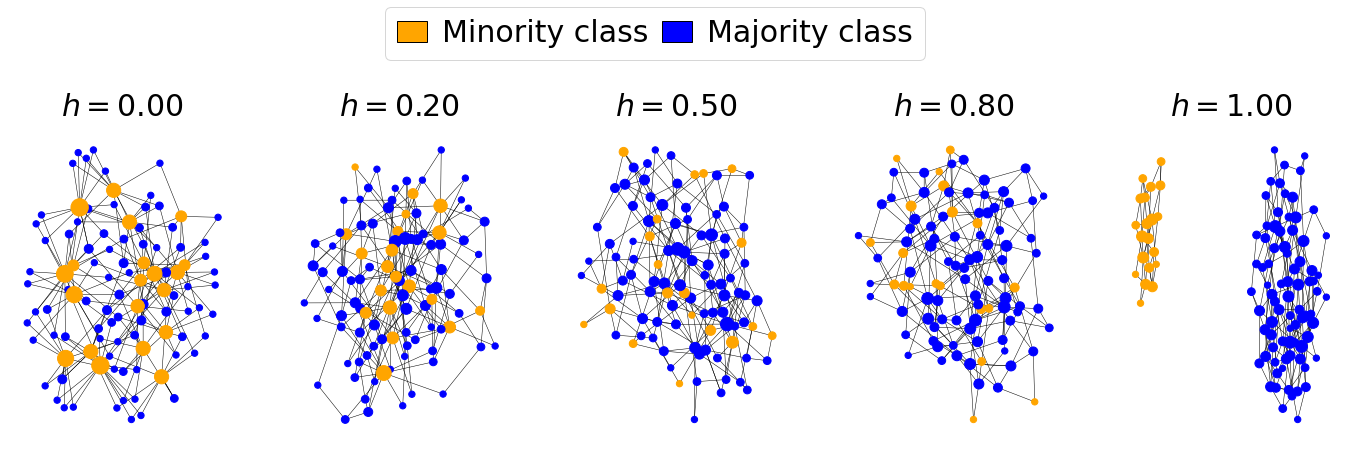

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(24,6))

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=30, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

n = 100
m = 2
c0 = 0.8
c1 = 0.2

h_values = [0, 0.2, 0.5, 0.8, 1]

for i, h in enumerate(h_values):
    G, node_class = model.model(n, m, c0, c1, h)
    node_color = ['blue' if c == 0 else 'orange' for c in node_class]
    node_size = np.array(list(dict(G.degree()).values())) * 20
    nx.draw(G, node_color=node_color, ax=axes[i], node_size=node_size, width=0.5)
    axes[i].set_title(r'$h=%.2f$' % (h), fontsize=30)
    
plt.show()

### Degree distribution for several experiments <a class="anchor" id="chapter4"></a>

In [7]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/exec_1'

In [8]:
n = 5000
m = 5
c0 = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
c1 = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
h = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, results_1, step_1 = graphics.load_data_for_plots(n=n, m=m, c0=c0, c1=c1, h=h, n_simulations=n_simulations, folder_name=current_path)

In [9]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/exec_2'

In [10]:
n = 5000
m = 5
c0 = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
c1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
h = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, results_2, step_2 = graphics.load_data_for_plots(n=n, m=m, c0=c0, c1=c1, h=h, n_simulations=n_simulations, folder_name=current_path)

In [11]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/exec_3'

In [12]:
n = 5000
m = 5
c0 = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
c1 = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
h = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, results_3, step_3 = graphics.load_data_for_plots(n=n, m=m, c0=c0, c1=c1, h=h, n_simulations=n_simulations, folder_name=current_path)

In [13]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/exec_4'

In [14]:
n = 5000
m = 5
c0 = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
c1 = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
h = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_simulations = 20

avg_degree_majority_4, avg_degree_minority_4, degree_dist_majority_4, degree_dist_minority_4, results_4, step_4 = graphics.load_data_for_plots(n=n, m=m, c0=c0, c1=c1, h=h, n_simulations=n_simulations, folder_name=current_path)

In [15]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/exec_5'

In [16]:
n = 5000
m = 5
c0 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
c1 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
h = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_simulations = 20

avg_degree_majority_5, avg_degree_minority_5, degree_dist_majority_5, degree_dist_minority_5, results_5, step_5 = graphics.load_data_for_plots(n=n, m=m, c0=c0, c1=c1, h=h, n_simulations=n_simulations, folder_name=current_path)

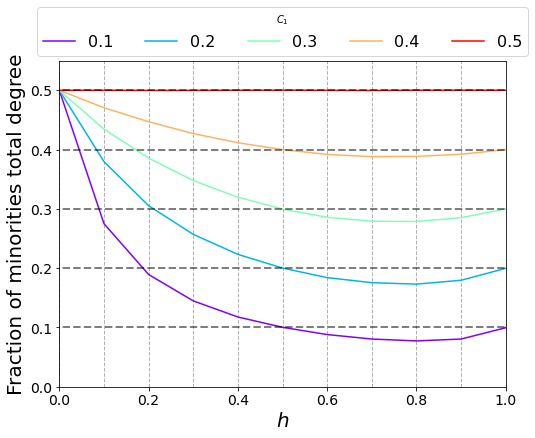

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

evenly_spaced_interval = np.linspace(0, 1, 5)
colors = [plt.cm.rainbow(x) for x in evenly_spaced_interval]

for v in x:
    plt.axvline(x=v, linewidth=1, linestyle='--', color='k', alpha=0.3)

y = avg_degree_minority_2
plt.plot(x, y, label='0.1', color=colors[0])
plt.plot([-1, 2], [0.1, 0.1], linewidth=2, linestyle='--', color='k', alpha=0.5)

y = avg_degree_minority_1
plt.plot(x, y, label='0.2', color=colors[1])
plt.plot([-1, 2], [0.2, 0.2], linewidth=2, linestyle='--', color='k', alpha=0.5)

y = avg_degree_minority_3
plt.plot(x, y, label='0.3', color=colors[2])
plt.plot([-1, 2], [0.3, 0.3], linewidth=2, linestyle='--', color='k', alpha=0.5)

y = avg_degree_minority_4
plt.plot(x, y, label='0.4', color=colors[3])
plt.plot([-1, 2], [0.4, 0.4], linewidth=2, linestyle='--', color='k', alpha=0.5)

y = avg_degree_minority_5
plt.plot(x, y, label='0.5', color=colors[4])
plt.plot([-1, 2], [0.5, 0.5], linewidth=2, linestyle='--', color='k', alpha=0.5)

plt.xlim(0, 1)
plt.ylim(0, 0.55)

plt.xlabel(r"$h$", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("Fraction of minorities total degree", fontsize=20)
plt.yticks(fontsize=14)
plt.legend(loc='upper center',  bbox_to_anchor=(0.5, 1.19),
           fancybox=True, shadow=False, ncol=5, title=r"$C_1$", fontsize=16)
plt.rcParams['axes.titley'] = 1.1

plt.show()

### % of nodes of the minority class in the top nodes with largest degree for several homophily values <a class="anchor" id="chapter5"></a>

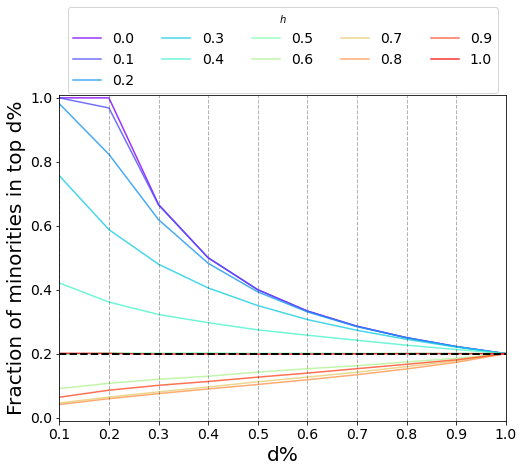

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

evenly_spaced_interval = np.linspace(0, 1, len(h))
colors = [plt.cm.rainbow(x) for x in evenly_spaced_interval]

for i in range(len(h)):
    plt.plot(step_1, results_1[i,:], alpha=0.8, color=colors[i])

h = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

plt.xlabel("d%", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("Fraction of minorities in top d%", fontsize=20)
plt.yticks(fontsize=14)

plt.legend(["%.1f" % (h[i]) for i in range(len(h))], title=r"$h$", loc='upper center',  bbox_to_anchor=(0.5, 1.29),
          fancybox=True, shadow=False, ncol=5, fontsize=14)

for v in h:
    plt.axvline(x=v, linewidth=1, linestyle='--', color='k', alpha=0.3)

# Reference line
plt.axhline(y=0.2, xmin=0, xmax=1, linestyle='--', color='k', linewidth=2)

plt.axis([0.1, 1, -0.01, 1.01])
plt.show()